In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

In [2]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('C:\\Users\\Onur\\Desktop\\ml-100k\\u.user', sep='|', names=u_cols,
                    encoding='latin-1')

r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('C:\\Users\\Onur\\Desktop\\ml-100k\\u.data', sep='\t', names=r_cols,
                      encoding='latin-1')

In [3]:
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url',
          'unknown','Action','Adventure','Animation','Children','Comedy','Crime',
          'Documentary','Drama','Fantasy','FilmNoir','Horror','Musical','Mystery',
          'Romance','SciFi','Thriller','War','Western']
movie_df = pd.read_csv('C:\\Users\\Onur\\Desktop\\ml-100k\\u.item', sep='|', names=m_cols,
                     encoding='latin-1')
movie_df.head(10)

,movie_id,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
df = movie_df[['unknown','Action','Adventure','Animation','Children',
                               'Comedy','Crime','Documentary','Drama','Fantasy','FilmNoir',
                               'Horror','Musical','Mystery','Romance','SciFi','Thriller',
                               'War','Western']].applymap(lambda x: np.nan if x == 0 else x)
movie_df['genres'] = df.replace(1, pd.Series(df.columns, df.columns))\
                       .apply(lambda x: '|'.join(x.dropna()), axis=1)
movie_df.head()

,movie_id,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children,...,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,genres
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,Animation|Children|Comedy
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,Action|Adventure|Thriller
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Thriller
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Action|Comedy|Drama
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Crime|Drama|Thriller


In [6]:
movies = movie_df[['movie_id', 'title','genres']] 

In [8]:
users.head(20)

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user_id       943 non-null int64
age           943 non-null int64
sex           943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [10]:
ratings.head(10)

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [11]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user_id      100000 non-null int64
movie_id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [13]:
movies.head(10)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children|Comedy
1,2,GoldenEye (1995),Action|Adventure|Thriller
2,3,Four Rooms (1995),Thriller
3,4,Get Shorty (1995),Action|Comedy|Drama
4,5,Copycat (1995),Crime|Drama|Thriller
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,Drama
6,7,Twelve Monkeys (1995),Drama|SciFi
7,8,Babe (1995),Children|Comedy|Drama
8,9,Dead Man Walking (1995),Drama
9,10,Richard III (1995),Drama|War


In [14]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 3 columns):
movie_id    1682 non-null int64
title       1682 non-null object
genres      1682 non-null object
dtypes: int64(1), object(2)
memory usage: 39.5+ KB


In [15]:
movie_ratings = pd.merge(ratings, movies, on='movie_id')
lens = pd.merge(movie_ratings, users)

In [16]:
movie_ratings.head()

,user_id,movie_id,rating,timestamp,title,genres
0,196,242,3,881250949,Kolya (1996),Comedy
1,63,242,3,875747190,Kolya (1996),Comedy
2,226,242,5,883888671,Kolya (1996),Comedy
3,154,242,3,879138235,Kolya (1996),Comedy
4,306,242,5,876503793,Kolya (1996),Comedy


In [17]:
lens.head()

,user_id,movie_id,rating,timestamp,title,genres,age,sex,occupation,zip_code
0,196,242,3,881250949,Kolya (1996),Comedy,49,M,writer,55105
1,196,257,2,881251577,Men in Black (1997),Action|Adventure|Comedy|SciFi,49,M,writer,55105
2,196,111,4,881251793,"Truth About Cats & Dogs, The (1996)",Comedy|Romance,49,M,writer,55105
3,196,25,4,881251955,"Birdcage, The (1996)",Comedy,49,M,writer,55105
4,196,382,4,881251843,"Adventures of Priscilla, Queen of the Desert, ...",Comedy|Drama,49,M,writer,55105


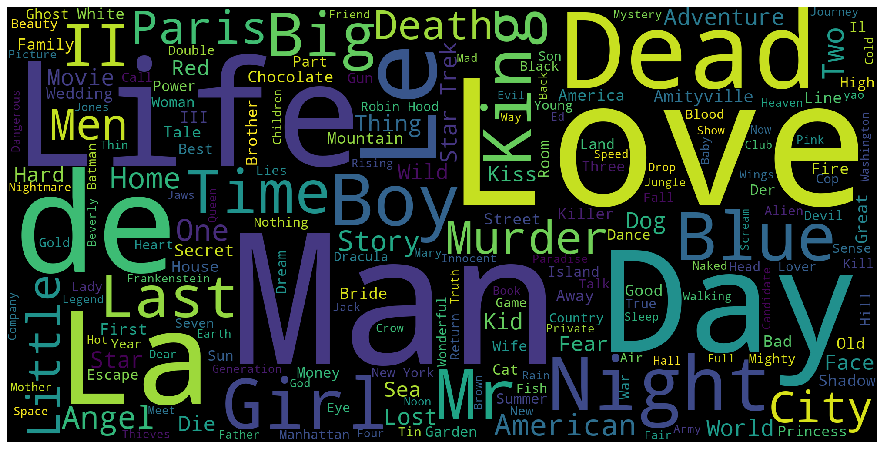

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS

movies['title'] = movies['title'].fillna("").astype('str')
title_corpus = ' '.join(movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', 
                            height=1000, width=2000).generate(title_corpus)

plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [19]:
ratings['rating'].describe()

count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

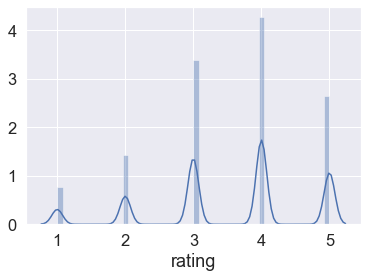

In [20]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%matplotlib inline

sns.distplot(ratings['rating'].fillna(ratings['rating'].median()))

In [21]:
lens[['title','genres','rating']].sort_values('rating', ascending=False)[:15]

,title,genres,rating
50000,12 Angry Men (1957),Drama,5
66899,Amadeus (1984),Drama|Mystery,5
23608,Sense and Sensibility (1995),Drama|Romance,5
23604,Fargo (1996),Crime|Drama|Thriller,5
23603,Fly Away Home (1996),Adventure|Children,5
66880,12 Angry Men (1957),Drama,5
23601,Toy Story (1995),Animation|Children|Comedy,5
23600,L.A. Confidential (1997),Crime|FilmNoir|Mystery|Thriller,5
66881,"Godfather, The (1972)",Action|Crime|Drama,5
66887,Pulp Fiction (1994),Crime|Drama,5


In [22]:
movie_stats = lens.groupby('title').agg({'rating': [np.size, np.mean]})
movie_stats.head(10)

rating          
                                              size      mean
title                                                       
'Til There Was You (1997)                        9  2.333333
1-900 (1994)                                     5  2.600000
101 Dalmatians (1996)                          109  2.908257
12 Angry Men (1957)                            125  4.344000
187 (1997)                                      41  3.024390
2 Days in the Valley (1996)                     93  3.225806
20,000 Leagues Under the Sea (1954)             72  3.500000
2001: A Space Odyssey (1968)                   259  3.969112
3 Ninjas: High Noon At Mega Mountain (1998)      5  1.000000
39 Steps, The (1935)                            59  4.050847

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016CB5279F88>,
      dtype=object)

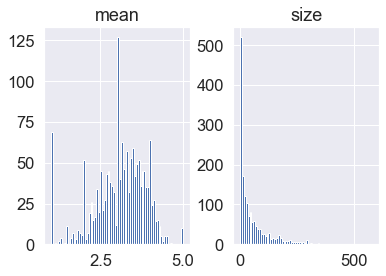

In [23]:
movie_stats['rating'].hist(bins=70)

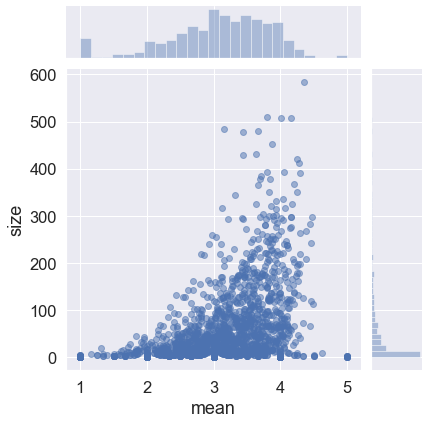

In [24]:
sns.jointplot(x='mean', y='size', data=movie_stats['rating'], alpha=0.5)

In [25]:
atleast_100 = movie_stats['rating']['size'] >= 100
movie_stats[atleast_100].sort_values([('rating', 'mean')], ascending=False)[:10]

rating          
                                   size      mean
title                                            
Close Shave, A (1995)               112  4.491071
Schindler's List (1993)             298  4.466443
Wrong Trousers, The (1993)          118  4.466102
Casablanca (1942)                   243  4.456790
Shawshank Redemption, The (1994)    283  4.445230
Rear Window (1954)                  209  4.387560
Usual Suspects, The (1995)          267  4.385768
Star Wars (1977)                    583  4.358491
12 Angry Men (1957)                 125  4.344000
Citizen Kane (1941)                 198  4.292929

In [26]:
movie_stats[atleast_100].sort_values([('rating', 'size')], ascending=False)[:10]

rating          
                                size      mean
title                                         
Star Wars (1977)                 583  4.358491
Contact (1997)                   509  3.803536
Fargo (1996)                     508  4.155512
Return of the Jedi (1983)        507  4.007890
Liar Liar (1997)                 485  3.156701
English Patient, The (1996)      481  3.656965
Scream (1996)                    478  3.441423
Toy Story (1995)                 452  3.878319
Air Force One (1997)             431  3.631090
Independence Day (ID4) (1996)    429  3.438228

In [27]:
most_50 = lens.groupby('movie_id').size().sort_values(ascending=False)[:50]
most_50.head()

movie_id
50     583
258    509
100    508
181    507
294    485
dtype: int64

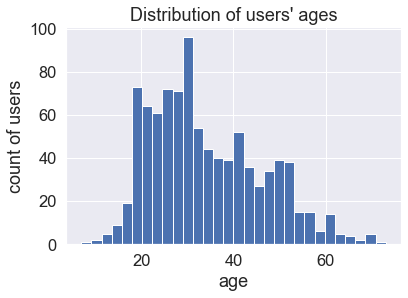

In [28]:
users.age.plot.hist(bins=30)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age');

In [29]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
lens['age_group'] = pd.cut(lens.age, range(0, 81, 10), right=False, labels=labels)
lens[['age', 'age_group']].drop_duplicates()[:10]

,age,age_group
0,49,40-49
39,31,30-39
132,28,20-29
182,25,20-29
233,45,40-49
265,43,40-49
412,38,30-39
432,51,50-59
710,27,20-29
1096,33,30-39


In [30]:
lens.groupby('age_group').agg({'rating': [np.size, np.mean]})

rating          
            size      mean
age_group                 
0-9           43  3.767442
10-19       8181  3.486126
20-29      39535  3.467333
30-39      25696  3.554444
40-49      15021  3.591772
50-59       8704  3.635800
60-69       2623  3.648875
70-79        197  3.649746

In [31]:
lens.set_index('movie_id', inplace=True)
by_age = lens.loc[most_50.index].groupby(['title', 'age_group'])
by_age.rating.mean().head(15)

title                 age_group
Air Force One (1997)  0-9               NaN
                      10-19        3.647059
                      20-29        3.666667
                      30-39        3.570000
                      40-49        3.555556
                      50-59        3.750000
                      60-69        3.666667
                      70-79        3.666667
Alien (1979)          0-9               NaN
                      10-19        4.111111
                      20-29        4.026087
                      30-39        4.103448
                      40-49        3.833333
                      50-59        4.272727
                      60-69        3.500000
Name: rating, dtype: float64

In [32]:
by_age.rating.mean().unstack(1).fillna(0)[10:20]

age_group,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79
title,,,,,,,,
E.T. the Extra-Terrestrial (1982),0.0,3.680000,3.609091,3.806818,4.160000,4.368421,4.375000,0.000000
"Empire Strikes Back, The (1980)",4.0,4.642857,4.311688,4.052083,4.100000,3.909091,4.250000,5.000000
"English Patient, The (1996)",5.0,3.739130,3.571429,3.621849,3.634615,3.774648,3.904762,4.500000
Fargo (1996),0.0,3.937500,4.010471,4.230769,4.294118,4.442308,4.000000,4.333333
Forrest Gump (1994),5.0,4.047619,3.785714,3.861702,3.847826,4.000000,3.800000,0.000000
"Fugitive, The (1993)",0.0,4.320000,3.969925,3.981481,4.190476,4.240000,3.666667,0.000000
"Full Monty, The (1997)",0.0,3.421053,4.056818,3.933333,3.714286,4.146341,4.166667,3.500000
"Godfather, The (1972)",0.0,4.400000,4.345070,4.412844,3.929412,4.463415,4.125000,0.000000
Groundhog Day (1993),0.0,3.476190,3.798246,3.786667,3.851064,3.571429,3.571429,4.000000


In [33]:
lens.reset_index('movie_id', inplace=True)

In [35]:
pivoted = lens.pivot_table(index=['movie_id', 'title'],
                           columns=['sex'],
                           values='rating',
                           fill_value=0)
pivoted.head(8)

,sex,F,M
movie_id,title,,
1,Toy Story (1995),3.789916,3.909910
2,GoldenEye (1995),3.368421,3.178571
3,Four Rooms (1995),2.687500,3.108108
4,Get Shorty (1995),3.400000,3.591463
5,Copycat (1995),3.772727,3.140625
6,Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),3.600000,3.571429
7,Twelve Monkeys (1995),3.560976,3.861290
8,Babe (1995),4.050000,3.974843


In [36]:
pivoted['diff'] = pivoted.M - pivoted.F
pivoted.head(8)

,sex,F,M,diff
movie_id,title,,,
1,Toy Story (1995),3.789916,3.909910,0.119994
2,GoldenEye (1995),3.368421,3.178571,-0.189850
3,Four Rooms (1995),2.687500,3.108108,0.420608
4,Get Shorty (1995),3.400000,3.591463,0.191463
5,Copycat (1995),3.772727,3.140625,-0.632102
6,Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),3.600000,3.571429,-0.028571
7,Twelve Monkeys (1995),3.560976,3.861290,0.300315
8,Babe (1995),4.050000,3.974843,-0.075157


In [37]:
pivoted.reset_index('movie_id', inplace=True)

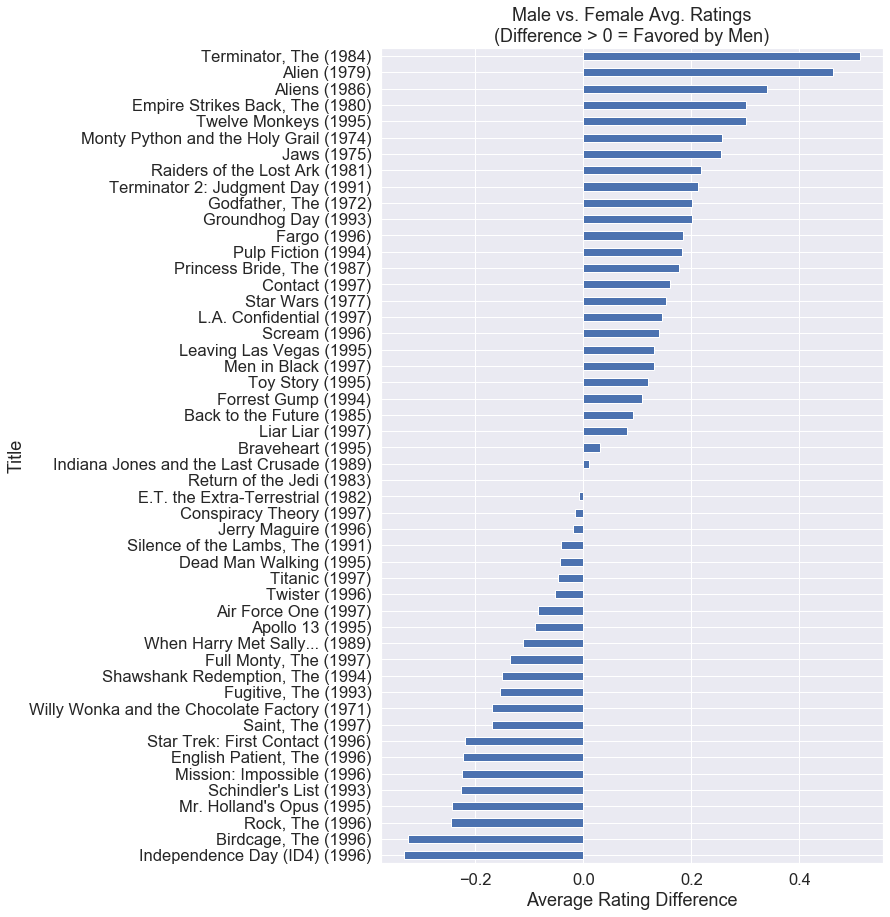

In [38]:
disagreements = pivoted[pivoted.movie_id.isin(most_50.index)]['diff']
disagreements.sort_values().plot(kind='barh', figsize=[9, 15])
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference');

In [39]:
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
    
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

keyword_occurences, dum = count_word(movies, 'genres', genre_labels)
keyword_occurences[:5]

[['Drama', 725],
 ['Comedy', 505],
 ['Thriller', 251],
 ['Action', 251],
 ['Romance', 247]]

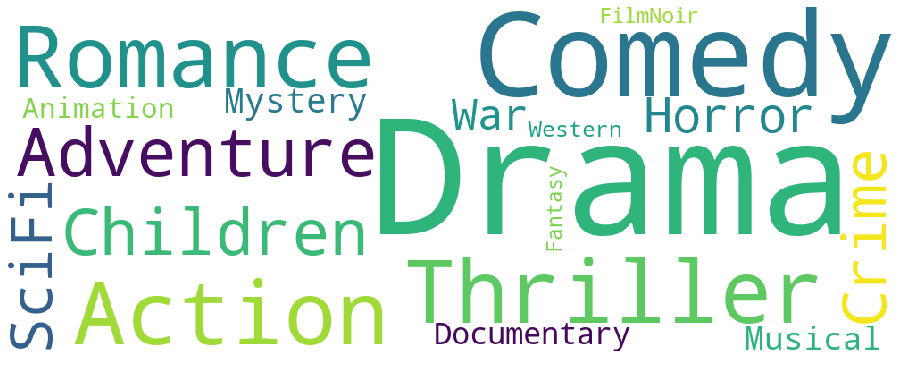

In [41]:
genres = dict()
trunc_occurences = keyword_occurences[0:18]
for s in trunc_occurences:
    genres[s[0]] = s[1]

genre_wordcloud = WordCloud(width=1000,height=400, background_color='white')
genre_wordcloud.generate_from_frequencies(genres)

f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud)
plt.axis('off')
plt.show()